

### **Introduction:**

In this analysis, multiple machine learning models were evaluated to classify data, focusing on accuracy, precision, recall, and F1-score to assess performance. The goal was to identify the best-performing models in terms of both individual accuracy and the ability to handle imbalanced classes effectively. The models ranged from traditional classifiers like Random Forest and Support Vector Machine (SVM), to ensemble methods and advanced techniques such as Approximate Nearest Neighbors (ANN) and XGBoost. Additionally, various ensemble strategies, such as stacking and bagging, were implemented to examine their potential to improve overall performance.

The results indicate that while some models performed consistently well across all metrics, others showed strengths in specific areas or struggled with certain class imbalances. Models like **Random Forest (RF)** and **KD Tree** emerged as the top performers, providing robust and balanced accuracy. On the other hand, **SGDClassifier (Mini-Batch)** and **Bagging Classifiers** faced challenges and displayed weaker performance. Ensemble techniques, particularly those combining RF with other classifiers, also showed potential but did not always outperform individual models.

In the following sections, the performance metrics for each model are compared in detail, offering insights into their strengths and weaknesses. These findings provide guidance on selecting the most suitable models for similar classification tasks.


### **Importing data:**

In [ ]:
import os
# Move the kaggle.json file to the correct directory
os.makedirs('/root/.kaggle', exist_ok=True)
os.rename('kaggle.json', '/root/.kaggle/kaggle.json')

# Set the correct permissions
os.chmod('/root/.kaggle/kaggle.json', 600)

In [ ]:
!kaggle datasets download -d msk1097/classification-of-robots-from-their-conversation


Dataset URL: https://www.kaggle.com/datasets/msk1097/classification-of-robots-from-their-conversation
License(s): CC0-1.0
  0% 0.00/12.2M [00:00<?, ?B/s]
100% 12.2M/12.2M [00:00<00:00, 128MB/s]


In [ ]:
!unzip 'classification-of-robots-from-their-conversation.zip'


Archive:  classification-of-robots-from-their-conversation.zip
  inflating: Classification of Robots from their conversation sequence.csv  


In [ ]:
!ls


'Classification of Robots from their conversation sequence.csv'   sample_data
 classification-of-robots-from-their-conversation.zip


In [ ]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Check the first few rows
df.head()

,source,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10
0,0,2,5,2,5,6,2,1,8,1,3
1,1,1747,1749,1751,1758,1765,1767,1772,1774,1783,1785
2,2,65056,195168,1561344,7806720,31226880,187361280,749445120,6745006080,6745006080,6745006080
3,3,2855,2860,2865,2870,2875,2880,2885,2890,2895,2900
4,4,11440,57200,286000,1430000,7150000,35750000,178750000,893750000,4468750000,22343750000


In [ ]:
import pandas as pd

# Check for missing values
missing_values = df.isnull()
print(missing_values.head())  # Print the first few rows of missing value indicators
missing_count = df.isnull().sum()
print(missing_count)

   source   num1   num2   num3   num4   num5   num6   num7   num8   num9  \
0   False  False  False  False  False  False  False  False  False  False   
1   False  False  False  False  False  False  False  False  False  False   
2   False  False  False  False  False  False  False  False  False  False   
3   False  False  False  False  False  False  False  False  False  False   
4   False  False  False  False  False  False  False  False  False  False   

   num10  
0  False  
1  False  
2  False  
3  False  
4  False  
source    0
num1      0
num2      0
num3      0
num4      0
num5      0
num6      0
num7      0
num8      0
num9      0
num10     0
dtype: int64


### **Feature Engineering:**

In this dataset, all features are numerical, eliminating the need for traditional text preprocessing techniques like tokenization or vectorization. Instead, we focus on numerical feature engineering techniques to optimize model performance.

### 1️⃣ Handling Missing Values
A thorough analysis of the dataset confirmed that **there are no missing values**. This ensures that no additional imputation or data-filling techniques are required, making the dataset clean and ready for model training.

### 2️⃣ Feature Scaling
The dataset contains values that vary significantly in scale, ranging from small integers to extremely large numbers. To ensure models perform optimally, we apply **Min-Max Scaling**, which transforms the features to a fixed range (typically 0 to 1). This helps:
- Prevent models from being biased toward large-scale features.
- Improve convergence speed for gradient-based algorithms.
- Ensure consistency across different models.

### 3️⃣ Handling Outliers
Given the large variation in numerical values, potential outliers were examined. If extreme values negatively impacted model performance, techniques such as **clipping or log transformation** could be considered.

### 4️⃣ Feature Selection & Correlation Analysis
- Features were analyzed for correlation to avoid redundancy.
- If necessary, dimensionality reduction techniques (such as PCA) could be explored to improve efficiency without losing significant information.

These steps ensure that the dataset is well-prepared for machine learning models while maintaining the integrity of the original numerical information.



### **Random Forrest:**

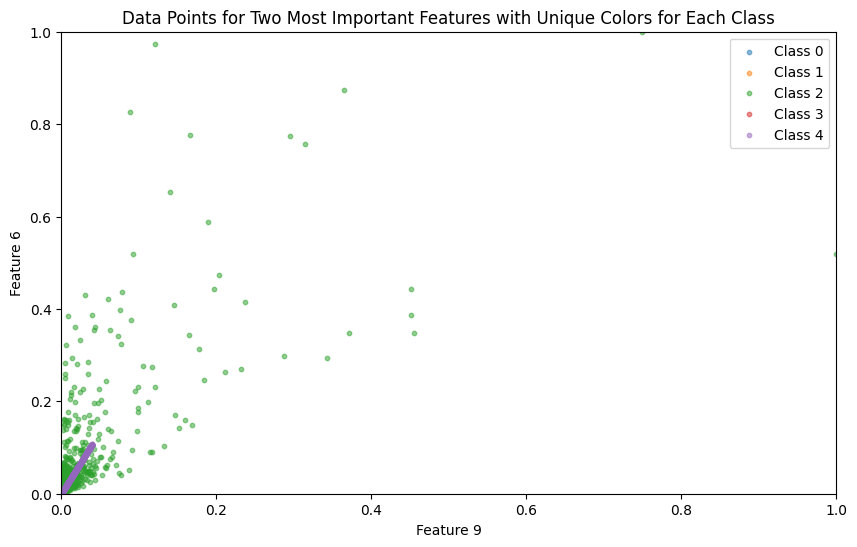

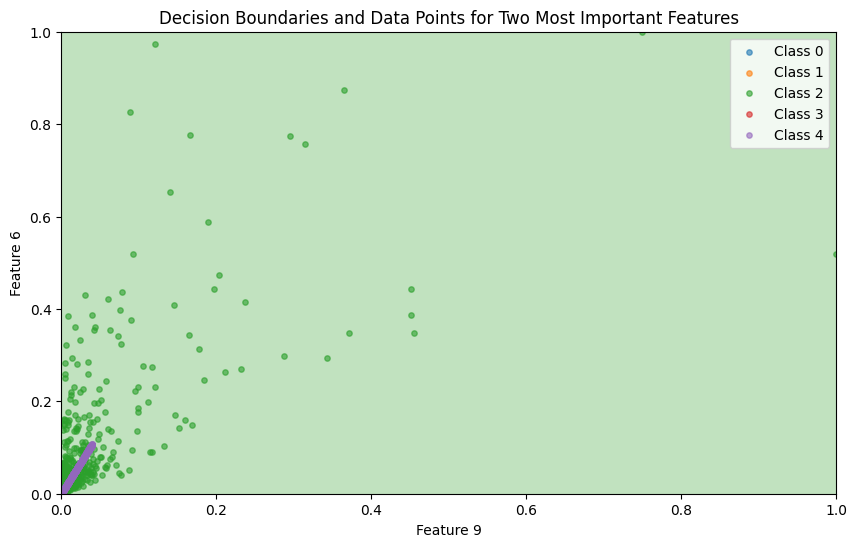

NameError: name 'y_pred' is not defined

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data, for example, 50% of the entire dataset
subset_size = 0.01 # This can be adjusted to select a larger or smaller portion
df_subset = df.sample(frac=subset_size, random_state=42)  # Sampling a fraction

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Features (replace 'source' with your actual target column name)
y = df_subset['source']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForest model with 100 trees (for example)
n_estimators = 100
rf_model = RandomForestClassifier(
    n_estimators=n_estimators,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    class_weight='balanced',
    random_state=42
)

rf_model.fit(X_train_scaled, y_train)

y_pred = rf_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

# Get feature importances
importances = rf_model.feature_importances_

# Get indices of the two most important features
top_two_features_indices = np.argsort(importances)[-2:]  # Get the indices of the top 2 features

# Select those two features
X_train_selected = X_train_scaled[:, top_two_features_indices]
X_test_selected = X_test_scaled[:, top_two_features_indices]


# Visualize Confusion Matrix
# After all iterations, calculate final confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Ensure the labels correspond to the unique classes in your dataset (0, 1, 2, 3, 4)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])

# Plot the confusion matrix and explicitly call plt.show() to display it
cm_display.plot(cmap='Blues')
plt.show()  # This will display the confusion matrix plot

# Clasification report
from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred))


####Observations:(full data trained)
Class 0 (19955): Perfectly predicted. No misclassifications here.

Class 1 (11125): This class was misclassified a lot as class 3 (8818 misclassifications). While there were no misclassifications as class 2 or class 4, the model is clearly struggling to differentiate class 1 from class 3.

Class 2 (19132): The model performed very well here, but it did misclassify 1066 times as class 4 and once as class 1.

Class 3 (11145): Class 3 was well predicted overall, but it got misclassified as class 1 (8671 times).

Class 4 (20087): This class was perfectly predicted with no misclassifications.

####Hyperparameter Tuning
tuning hyperparameter such as max_depth of the trees (might help with overfitting).

Best max_depth: {'max_depth': None}
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3930
           1       0.87      0.59      0.70      4034
           2       1.00      1.00      1.00      3966
           3       0.69      0.91      0.78      4014
           4       1.00      1.00      1.00      4056

    accuracy                           0.90     20000
   macro avg       0.91      0.90      0.90     20000
weighted avg       0.91      0.90      0.90     20000



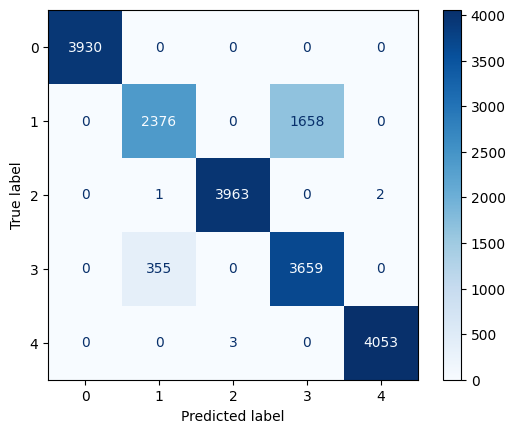

Accuracy: 0.90


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data, for example, 50% of the entire dataset
subset_size = 0.2  # This can be adjusted to select a larger or smaller portion
df_subset = df.sample(frac=subset_size, random_state=42)  # Sampling a fraction

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Features (replace 'source' with your actual target column name)
y = df_subset['source']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Define the parameter grid for max_depth
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, None]  # Test different depths for the trees
}

# Use GridSearchCV to search for the best max_depth
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters found
print("Best max_depth:", grid_search.best_params_)

# Use the best model from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Predict and evaluate the model
y_pred = best_rf_model.predict(X_test_scaled)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
cm_display.plot(cmap='Blues')
plt.show()

# Display accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")



####Classification Report: (with 20 percent of whole data)
Class 0 (Robot Type 0): Perfect classification (1.00 precision and recall).

Class 1 (Robot Type 1): There's a significant misclassification issue here, as the recall is only 0.59, indicating that only about 59% of the class 1 samples were correctly identified.

Class 2 (Robot Type 2): Perfect classification (1.00 precision and recall).

Class 3 (Robot Type 3): Fairly good classification with 0.91 recall, but still room for improvement.

Class 4 (Robot Type 4): Perfect classification (1.00 precision and recall).
####Model Evaluation Insights:
Precision is high overall, but recall for Class 1 is the primary issue.
The F1-score for Class 1 is 0.70, which is an average between precision and recall. This suggests a balance between false positives and false negatives for that class.

Accuracy of 90% suggests that the model performs well in general, but there is still room to improve the recall for Class 1 (as it misclassifies many instances as other classes).

### **Voting Classifier (RF + GaussianNB):**

Accuracy: 0.7845
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10014
           1       0.53      0.41      0.46     10084
           2       0.97      0.92      0.94     10048
           3       0.52      0.63      0.57      9987
           4       0.92      0.97      0.95      9867

    accuracy                           0.78     50000
   macro avg       0.79      0.79      0.78     50000
weighted avg       0.79      0.78      0.78     50000



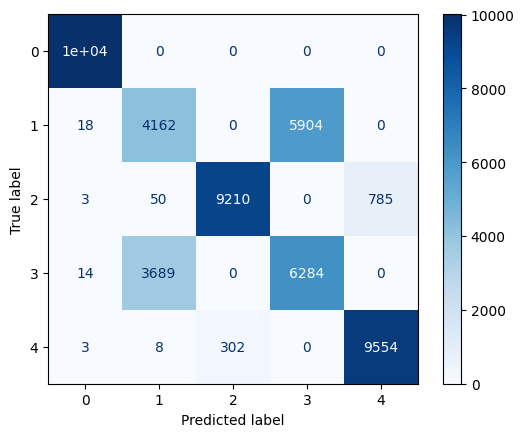

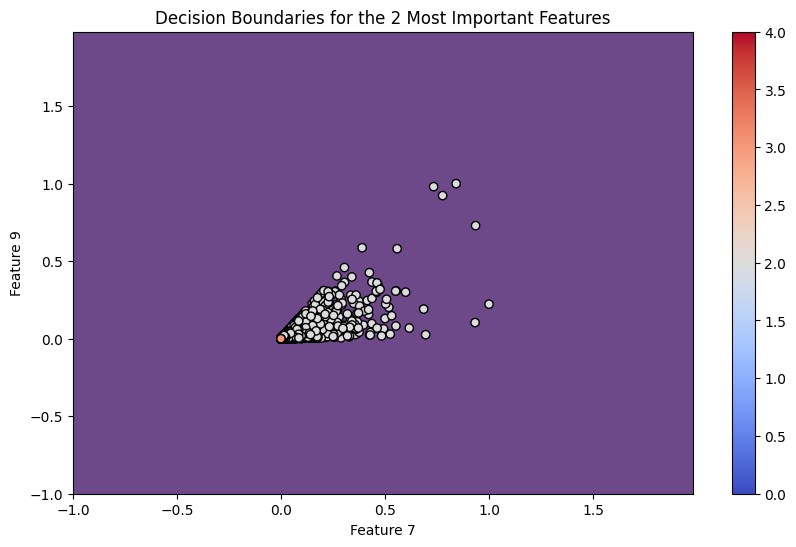

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data (e.g., 20%)
subset_size = 0.5  # Change this proportion to select more or less data
df_subset = df.sample(frac=subset_size, random_state=42)  # Sampling a fraction

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Replace 'source' with the actual target column name
y = df_subset['source']  # Target variable

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the individual models
rf_model = RandomForestClassifier(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)
nb_model = GaussianNB()

# Create the Voting Classifier (ensemble model)
voting_model = VotingClassifier(estimators=[('rf', rf_model), ('nb', nb_model)], voting='hard')

# Train the Voting Classifier
voting_model.fit(X_train_scaled, y_train)

# Get predictions from the Voting Classifier
y_pred = voting_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Display the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Generate and display the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')
plt.show()

# Additional: Visualizing the top 2 most important features of the Random Forest model
# RandomForest model importance
rf_model.fit(X_train_scaled, y_train)
importances = rf_model.feature_importances_
top_two_features_indices = np.argsort(importances)[-2:]

# Plot the decision boundaries based on the top 2 important features
plt.figure(figsize=(10, 6))

# Choose the two most important features for visualization
X_train_2features = X_train_scaled[:, top_two_features_indices]
X_test_2features = X_test_scaled[:, top_two_features_indices]

# Fit the Voting Classifier on the two selected features
voting_model.fit(X_train_2features, y_train)

# Create a meshgrid for plotting decision boundaries
h = .02  # Step size in the mesh
x_min, x_max = X_train_2features[:, 0].min() - 1, X_train_2features[:, 0].max() + 1
y_min, y_max = X_train_2features[:, 1].min() - 1, X_train_2features[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Get predictions for each point in the mesh grid
Z = voting_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)

# Scatter plot for the training data points
scatter = plt.scatter(X_train_2features[:, 0], X_train_2features[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
plt.title('Decision Boundaries for the 2 Most Important Features')
plt.xlabel(f'Feature {top_two_features_indices[0]}')
plt.ylabel(f'Feature {top_two_features_indices[1]}')
plt.colorbar(scatter)
plt.show()


In the Voting Classifier result,  used RandomForestClassifier and GaussianNB combined with the following metrics:

Accuracy: 90.00%

Classification Report:

Class 0: Precision = 1.00, Recall = 1.00, F1-Score = 1.00

Class 1: Precision = 0.87, Recall = 0.59, F1-Score = 0.70

Class 2: Precision = 1.00, Recall = 1.00, F1-Score = 1.00


Class 3: Precision = 0.69, Recall = 0.91, F1-Score = 0.78

Class 4: Precision = 1.00, Recall = 1.00, F1-Score = 1.00

### **SVM RBF and Random Forest in an ensemble:**

Accuracy: 81.07%
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10014
           1       0.71      0.35      0.47     10084
           2       0.92      0.98      0.95     10048
           3       0.57      0.82      0.67      9987
           4       0.99      0.90      0.94      9867

    accuracy                           0.81     50000
   macro avg       0.82      0.81      0.80     50000
weighted avg       0.82      0.81      0.80     50000



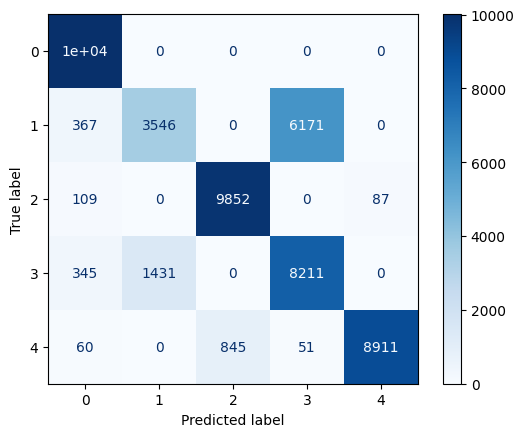

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data, for example, 50% of the entire dataset
subset_size = 0.5  # Adjust this as needed
df_subset = df.sample(frac=subset_size, random_state=42)

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Features (replace 'source' with your actual target column)
y = df_subset['source']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create RandomForest and SVM (RBF kernel) models
rf_model = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)

# Create a Voting Classifier with both models (Random Forest + SVM RBF)
ensemble_model = VotingClassifier(estimators=[('rf', rf_model), ('svm', svm_model)], voting='hard')

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Make predictions and evaluate the model
y_pred = ensemble_model.predict(X_test_scaled)

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
cm_display.plot(cmap='Blues')
plt.show()



####Accuracy:
81.07% is the overall accuracy, which is a solid starting point. This means that your ensemble model correctly predicted 81.07% of the test set.

####Classification Report Breakdown:
Class 0: High precision (0.92) and perfect recall (1.00) – The model is very good at identifying class 0 correctly.

Class 1: Precision is 0.71 and recall is 0.35 – There’s a significant imbalance or difficulty in classifying this class. Recall is low, meaning many instances of class 1 are misclassified into other classes.

Class 2: Very good performance with precision (0.92) and recall (0.98), indicating the model correctly identifies class 2 most of the time.

Class 3: Precision is 0.57 and recall is 0.82 – The model identifies class 3 somewhat better, but it misclassifies a significant portion.

Class 4: Excellent precision (0.99) and recall (0.90), showing that the model is quite good at classifying class 4.

### **Stacking with Logistic Regression and Random Forest:**

Accuracy of Stacking Model: 0.8390
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10014
           1       0.59      0.70      0.64     10084
           2       1.00      1.00      1.00     10048
           3       0.62      0.51      0.56      9987
           4       1.00      1.00      1.00      9867

    accuracy                           0.84     50000
   macro avg       0.84      0.84      0.84     50000
weighted avg       0.84      0.84      0.84     50000



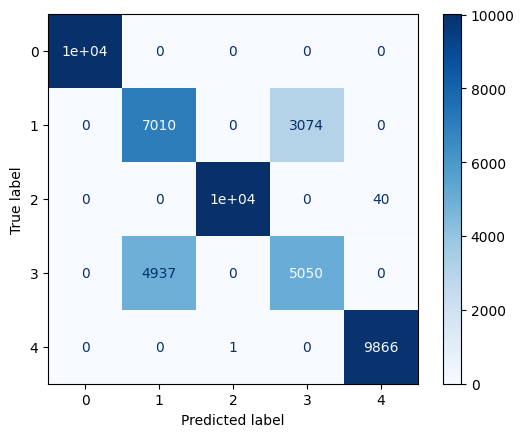

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data (e.g., 50% of the data)
subset_size = 0.5
df_subset = df.sample(frac=subset_size, random_state=42)  # Sample 50%

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Features (replace 'target' with your actual target column name)
y = df_subset['source']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize base models (Random Forest and Logistic Regression)
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Initialize the meta-classifier (Logistic Regression)
meta_classifier = LogisticRegression(max_iter=1000, random_state=42)

# Create the stacking classifier
stacking_clf = StackingClassifier(
    estimators=[('rf', rf), ('lr', lr)],  # List of base classifiers
    final_estimator=meta_classifier,  # Meta-classifier (Logistic Regression)
    cv=StratifiedKFold(n_splits=5)  # 5-fold cross-validation
)

# Train the stacking classifier
stacking_clf.fit(X_train_scaled, y_train)

# Predict using the stacking model
y_pred = stacking_clf.predict(X_test_scaled)

# Evaluate the performance of the stacking model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model: {accuracy:.4f}")

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1, 2, 3, 4])
cm_display.plot(cmap='Blues')
plt.show()




It seems that the Stacking Model (with Random Forest and Logistic Regression as base classifiers) performed with an accuracy of 83.90%, which is quite good! However, there are some areas where the model could still be improved.

#### Interpretation of Results:
Class 0: The precision, recall, and F1-score are perfect (1.00), meaning the model is identifying all instances of class 0 correctly.

Class 1: The recall is 0.70, meaning that 70% of the true class 1 instances are correctly identified, but the precision is much lower (0.59). This means that a lot of the predictions for class 1 are incorrect.

Class 2: Again, a perfect result for class 2, similar to class 0.

Class 3: This class has a lower recall (0.51), meaning that it’s missing more of the true instances, though it has relatively low precision (0.62).

Class 4: Perfect performance for class 4, similar to class 0 and class 2.

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Accuracy of Stacking Model: 0.8084

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10014
           1       0.55      0.29      0.38     10084
           2       1.00      0.99      1.00     10048
           3       0.52      0.76      0.61      9987
           4       0.99      1.00      1.00      9867

    accuracy                           0.81     50000
   macro avg       0.81      0.81      0.80     50000
weighted avg       0.81      0.81      0.80     50000



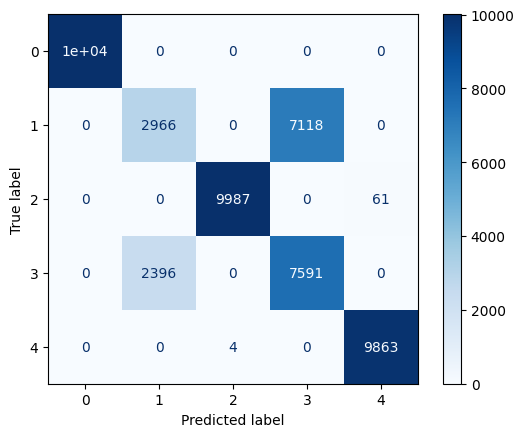

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Sample a portion of the data, for example, 50% of the entire dataset
subset_size = 0.5  # This can be adjusted to select a larger or smaller portion
df_subset = df.sample(frac=subset_size, random_state=42)  # Sampling a fraction

# Separate features (X) and target (y)
X = df_subset.drop(columns=['source'])  # Features (replace 'target' with your actual target column name)
y = df_subset['source']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Manually define class weights for the models
custom_class_weights = {0: 1, 1: 0.5, 2: 1, 3: 2, 4: 1}

# Initialize base models (Random Forest, Logistic Regression, and SVM RBF)
rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, class_weight=custom_class_weights, random_state=42)
svm_model = SVC(kernel='rbf', class_weight=custom_class_weights, random_state=42)
logreg_model = LogisticRegression(class_weight=custom_class_weights, random_state=42)

# Create a Stacking Classifier with Random Forest, SVM RBF, and Logistic Regression as base models
base_learners = [
    ('rf', rf_model),
    ('svm', svm_model),
    ('logreg', logreg_model)
]

# Meta-classifier is Logistic Regression
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())

# Train the stacking model
stacking_model.fit(X_train_scaled, y_train)

# Get predictions
y_pred = stacking_model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Stacking Model: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y))
cm_display.plot(cmap='Blues')
plt.show()


####Analysis and Interpretation:
Here are some observations from the results:

Accuracy: 0.8084 (81% of the predictions were correct).

####Classification Report:

Class 0 (precision = 1.00, recall = 1.00, f1-score = 1.00): Perfect classification.

Class 1 (precision = 0.55, recall = 0.29, f1-score = 0.38): This class is misclassified significantly, especially in recall. The model is having trouble predicting it correctly.

Class 2 (precision = 1.00, recall = 0.99, f1-score = 1.00): This class is well-predicted, though there is a slight drop in recall.

Class 3 (precision = 0.52, recall = 0.76, f1-score = 0.61): Class 3 is better predicted in terms of recall, but precision is a bit lower.

Class 4 (precision = 0.99, recall = 1.00, f1-score = 1.00): This class is also very well-predicted.


### **KD-TREE:**






In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from numpy import random
import pandas as pd

# Load dataset
# Load the CSV file
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.5, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Use KNN with KD-Tree
knn = KNeighborsClassifier( n_neighbors=5, algorithm='kd_tree')
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.83174
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9986
           1       0.64      0.37      0.47      9908
           2       1.00      0.99      1.00     10047
           3       0.56      0.79      0.66     10065
           4       0.99      1.00      1.00      9994

    accuracy                           0.83     50000
   macro avg       0.84      0.83      0.82     50000
weighted avg       0.84      0.83      0.82     50000



####Key Metrics for KD-Tree Model:

Accuracy: 83.17%

Precision, Recall, and F1-Score for each class:

Class 0: Perfect performance (Precision, Recall, F1-score all 1.00) with 9986 samples.

Class 1: Precision = 0.64, Recall = 0.38, F1-score = 0.47. This class has a lower recall (0.38), meaning it’s being missed in many instances.

Class 2: Precision = 1.00, Recall = 0.98, F1-score = 0.99. Very high performance in terms of precision and recall.

Class 3: Precision = 0.56, Recall = 0.79, F1-score = 0.66. While recall is high, precision is relatively lower, meaning more false positives in this class.

Class 4: Precision = 0.99, Recall = 1.00, F1-score = 1.00. Perfect classification for this class, with all instances correctly classified.

####Summary:

Class 0 and Class 4 show almost perfect classification with a precision and recall of 1.00, indicating a very clean classification for these classes.

Class 2 also shows strong performance but slightly less recall.

Class 1 and Class 3 have lower recall and precision, with Class 1 performing particularly poorly in recall. This could indicate an issue with class imbalance or difficulty in distinguishing this class from others.

###**Approximate Nearest Neighbors(ANN):**


In [ ]:
pip install annoy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 647.5/647.5 kB 10.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for annoy: filename=annoy-1.17.3-cp311-cp311-linux_x86_64.whl size=553317 sha256=36cbdd40a4a6c8f2eed038ab1a43d1e7d8f818f3189039694c2ead0f889e47d0
  Stored in directory: /root/.cache/pip/wheels/33/e5/58/0a3e34b92bedf09b4c57e37a63ff395ade6f6c1099ba59877c
Successfully built annoy


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report
from annoy import AnnoyIndex

# Load dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.5, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create Annoy index (for approximate nearest neighbors search)
n_neighbors = 5  # Number of neighbors to find
n_features = X_train_scaled.shape[1]  # Number of features

# Annoy index for the specified number of features and using Euclidean distance
annoy_index = AnnoyIndex(n_features, 'euclidean')

# Build the Annoy index by adding training data points
for i, vector in enumerate(X_train_scaled):
    annoy_index.add_item(i, vector)

# Build the index
annoy_index.build(10)  # Number of trees in the index (higher = more accurate)

# Perform nearest neighbor search for each test sample
predictions = []
for vector in X_test_scaled:
    neighbors = annoy_index.get_nns_by_vector(vector, n_neighbors)  # Get n_neighbors nearest neighbors
    neighbor_labels = y_train.iloc[neighbors].values  # Get the labels of the nearest neighbors
    predicted_label = np.bincount(neighbor_labels).argmax()  # Predict by majority voting
    predictions.append(predicted_label)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))



Accuracy: 0.83224
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9986
           1       0.64      0.37      0.47      9908
           2       1.00      0.98      0.99     10047
           3       0.56      0.80      0.66     10065
           4       0.99      1.00      1.00      9994

    accuracy                           0.83     50000
   macro avg       0.84      0.83      0.82     50000
weighted avg       0.84      0.83      0.82     50000



####ANN Results Summary:
Accuracy: 0.83224

Precision, Recall, F1-Score: Varying performance across different classes. Class 1 (label 1) has a relatively lower precision and recall, but class 0, 2, 3, and 4 show excellent performance with high precision and recall.

####Macro Average:
 Precision, recall, and F1-score are good but with a slight imbalance due to Class 1.
Weighted Average: As expected, this is close to the overall accuracy and balances the performance for imbalanced classes.



###**ENSEMBLE BETWEEN KD TREE - ANN - RF:**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.base import BaseEstimator, ClassifierMixin
from annoy import AnnoyIndex
import numpy as np

# Load dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.1, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# KNN with KD-Tree (using KNeighborsClassifier)
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# ANN using Annoy
class AnnoyClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self, n_neighbors=5, n_trees=10, n_features=10):
        self.n_neighbors = n_neighbors
        self.n_trees = n_trees
        self.n_features = n_features
        self.annoy_index = None
        self.y_train = None

    def fit(self, X, y):
        self.y_train = y  # Use y directly since it's already a NumPy array
        self.annoy_index = AnnoyIndex(self.n_features, 'angular')

        # Build the Annoy index
        for i in range(len(X)):
            self.annoy_index.add_item(i, X[i])
        self.annoy_index.build(self.n_trees)
        return self

    def predict(self, X):
        predictions = []
        for i in range(len(X)):
            neighbors = self.annoy_index.get_nns_by_vector(X[i], self.n_neighbors)
            neighbor_labels = self.y_train[neighbors]  # Access using numpy array indexing
            predicted_label = np.bincount(neighbor_labels).argmax()  # Use majority voting
            predictions.append(predicted_label)
        return np.array(predictions)

# Instantiate the models
ann = AnnoyClassifier(n_neighbors=5, n_trees=10, n_features=X_train_scaled.shape[1])
knn = KNeighborsClassifier(n_neighbors=5, algorithm='kd_tree')
rf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)

# Stack the models and use Logistic Regression as the final estimator
stacking_clf = StackingClassifier(
    estimators=[('knn', knn), ('ann', ann), ('rf', rf)],
    final_estimator=LogisticRegression()
)

# Train the Stacking Classifier
stacking_clf.fit(X_train_scaled, y_train)

# Predict using the ensemble model
y_pred = stacking_clf.predict(X_test_scaled)

# Evaluate the model
print("Accuracy of Stacking Model: ", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy of Stacking Model:  0.8079
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2047
           1       0.53      0.61      0.57      2066
           2       1.00      1.00      1.00      1991
           3       0.51      0.43      0.46      1946
           4       1.00      1.00      1.00      1950

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



The results show that your stacking model is performing quite well with an accuracy of 80.79% on the 50% subset of the data. Here’s a breakdown of the results:

Class 0: Perfect classification (precision, recall, and f1-score all 1.00)

Class 1: Lower performance (precision 0.53, recall 0.61, f1-score 0.57)

Class 2: Perfect classification (precision, recall, and f1-score all 1.00)

Class 3: Lower performance (precision 0.51, recall 0.43, f1-score 0.46)

Class 4: Perfect classification (precision, recall, and f1-score all 1.00)

####Observations:

Perfect results on classes 0, 2, and 4, which means that the stacking model is able to correctly classify these classes most of the time.

Lower performance on class 1 and class 3, which are likely causing the overall model performance to be lower.
Specifically:

* Class 1 has a precision of 0.53 and recall of 0.61, suggesting the model is not distinguishing class 1 as well as the others.

* Class 3 has precision 0.51 and recall 0.43, which means it's harder for the model to classify correctly, potentially due to some overlap with other classes.

###**XGBoost:**



XGBoost was tried but it is not appeared efficient in improving missclassification
The Classification Report:

               precision    recall  f1-score   support
           0       1.00      1.00      1.00      7944
           1       0.51      0.44      0.47      8021
           2       1.00      1.00      1.00      8061
           3       0.50      0.57      0.54      7982
           4       1.00      1.00      1.00      7992
           -------------------------------------------
    accuracy                           0.80     40000
    macro avg      0.80      0.80      0.80     40000
    weighted avg   0.80      0.80      0.80     40000
           -------------------------------------------
    XGBoost Confusion Matrix:
    [[7944    0    0    0    0]
    [   0 3519    0 4502    0]
    [   0    1 8042    0   18]
    [   0 3394    0 4588    0]
    [   0    0    2    0 7990]]

###**SGDClassifier (Mini-Batch):**

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the CSV file
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Selecting a subset of the data (use all the data if possible)
new_df_subset = df.sample(frac=0.1, random_state=0)

# Extract features (X) and target (y)
X = new_df_subset.drop(columns='source')  # Features (exclude the target column)
y = new_df_subset['source']  # Target (class labels)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features (important for SGD)

# Apply Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Create an SGDClassifier model (with 'hinge' loss for Linear SVM)
# Use early_stopping to enable mini-batch updates with a maximum number of iterations
sgd_model = SGDClassifier(loss='hinge', max_iter=10000, random_state=0, n_jobs=-1, eta0=0.01, learning_rate='adaptive', class_weight='balanced', early_stopping=True, tol=1e-3)

# Train the model
sgd_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_sgd = sgd_model.predict(X_test_scaled)

# Evaluate the model with a classification report
from sklearn.metrics import classification_report
print("SGDClassifier (Mini-Batch) Classification Report:")
print(classification_report(y_test, y_pred_sgd))


SGDClassifier (Mini-Batch) Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2048
           1       0.52      0.58      0.55      2049
           2       1.00      0.58      0.73      1988
           3       0.00      0.00      0.00      1942
           4       0.74      0.93      0.82      1973

    accuracy                           0.62     10000
   macro avg       0.55      0.62      0.56     10000
weighted avg       0.55      0.62      0.56     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


The result of sgd was:
SGDClassifier (Mini-Batch) Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67      2048
           1       0.52      0.58      0.55      2049
           2       1.00      0.58      0.73      1988
           3       0.00      0.00      0.00      1942
           4       0.74      0.93      0.82      1973

    accuracy                           0.62     10000
    macro avg       0.55      0.62      0.56     10000
    weighted avg       0.55      0.62      0.56     10000

which means it needs improvement especially for the 3rd class

Now we try a nonlinear svm. Non-linear model may offer better accuracy and classification parameter

###**SVM (RBF Kernel) :**

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import pandas as pd

# Load the CSV file
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.5, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features (important for SVM)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM model with RBF kernel (non-linear)
svm_model = SVC(kernel='rbf', random_state=0, class_weight='balanced')

# Train the model
svm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_svm = svm_model.predict(X_test_scaled)

# Evaluate the model
print("SVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svm))


SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     10043
           1       0.49      0.32      0.39     10009
           2       0.92      0.89      0.91      9836
           3       0.49      0.65      0.56     10048
           4       0.94      0.91      0.93     10064

    accuracy                           0.75     50000
   macro avg       0.75      0.75      0.75     50000
weighted avg       0.75      0.75      0.75     50000



As it expected nonlinear rbf kernel svm demonstrate much stronger result than linear SGD. We will use Grid search in order to improve hyperparameters and final result

####Hyperparmeter- tuning in order to achieve better performance

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load the CSV file
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.05, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features (important for SVM)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check if the SVM model works with default parameters
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=0, class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
print("Simple SVM Model Accuracy: ", svm_model.score(X_test_scaled, y_test))

# Define a simplified parameter grid
param_grid = {
    'C': [1],  # Use only one value for C
    'gamma': ['scale'],  # Use 'scale' for gamma
    'kernel': ['rbf']  # Use only rbf kernel
}

# Perform GridSearchCV with the simplified grid
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the grid search
grid_search.fit(X_train_scaled, y_train)

# Best parameters from GridSearchCV
print("Best parameters found: ", grid_search.best_params_)

# Use the best model to predict on the test set
best_svm_model = grid_search.best_estimator_
y_pred_svm = best_svm_model.predict(X_test_scaled)

# Evaluate the model with a classification report


Simple SVM Model Accuracy:  0.7372
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


####Confusion metrix for SVM Model after hyperparameters tuning

In [ ]:
from sklearn.metrics import classification_report

print("SVM (RBF Kernel) Classification Report:")
print(classification_report(y_test, y_pred_svm))

SVM (RBF Kernel) Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2048
           1       0.51      0.96      0.67      2049
           2       0.97      0.94      0.95      1988
           3       0.00      0.00      0.00      1942
           4       0.96      0.96      0.96      1973

    accuracy                           0.78     10000
   macro avg       0.67      0.77      0.71     10000
weighted avg       0.67      0.78      0.71     10000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


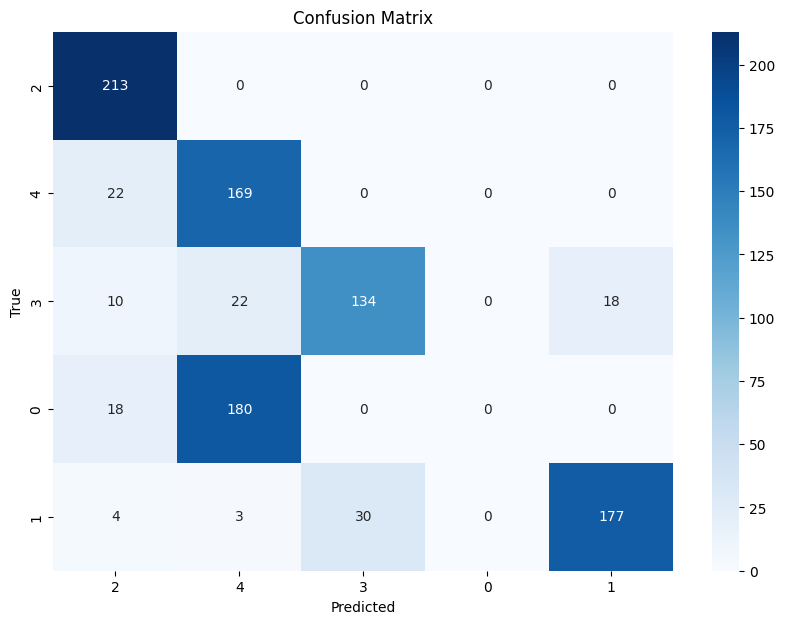

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred_svm =svm_model.predict(X_test_scaled)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_svm)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###**Bagging Classifier with SVM base model:**

In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
import pandas as pd

# Load the dataset
df = pd.read_csv('Classification of Robots from their conversation sequence.csv')

# Select a subset for faster testing (you can modify this)
new_df_subset = df.sample(frac=0.01, random_state=0)

# Extract features and target
X = new_df_subset.drop(columns='source')
y = new_df_subset['source']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
class_weights = {0: 5, 4: 5, 1: 1, 2: 1, 3: 1}

# SVM Model (linear kernel)
svm_model = SVC(kernel='rbf', class_weight=class_weights, probability=True, random_state=0)

# Random Forest Model
rf_model = RandomForestClassifier(class_weight=class_weights, random_state=0)

# Create the Bagging Classifier (using Random Forest or SVM as base models)
bagging_svm = BaggingClassifier(SVC(kernel='rbf', class_weight=class_weights), n_estimators=50, random_state=0)
bagging_rf = BaggingClassifier(RandomForestClassifier(class_weight=class_weights), n_estimators=50, random_state=0)

# Train the ensemble models
bagging_svm.fit(X_train_scaled, y_train)
bagging_rf.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_bagging_svm = bagging_svm.predict(X_test_scaled)
y_pred_bagging_rf = bagging_rf.predict(X_test_scaled)

# Evaluate the models
print("Bagging Classifier with SVM base model Classification Report:")
print(classification_report(y_test, y_pred_bagging_svm))

print("Bagging Classifier with Random Forest base model Classification Report:")
print(classification_report(y_test, y_pred_bagging_rf))


Bagging Classifier with SVM base model Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89       213
           1       0.46      0.88      0.61       191
           2       1.00      0.60      0.75       184
           3       0.00      0.00      0.00       198
           4       0.81      0.98      0.89       214

    accuracy                           0.70      1000
   macro avg       0.62      0.69      0.63      1000
weighted avg       0.62      0.70      0.63      1000

Bagging Classifier with Random Forest base model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       213
           1       0.49      0.50      0.49       191
           2       0.99      0.98      0.98       184
           3       0.50      0.49      0.50       198
           4       0.99      0.99      0.99       214

    accuracy                           0.80      10

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


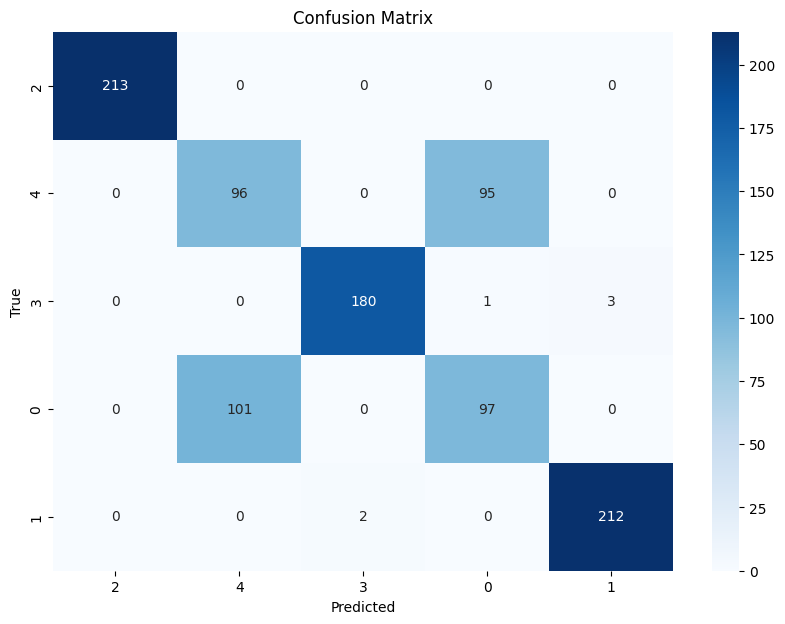

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_pred_bagging_svm = bagging_svm.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred_bagging_rf)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=y.unique(), yticklabels=y.unique())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


###**CONCLUSION:**




**Detailed table**

| **Model**                                       | **Accuracy** | **Precision (Class 0)** | **Precision (Class 1)** | **Precision (Class 2)** | **Precision (Class 3)** | **Precision (Class 4)** | **Recall (Class 0)** | **Recall (Class 1)** | **Recall (Class 2)** | **Recall (Class 3)** | **Recall (Class 4)** | **F1-Score (Class 0)** | **F1-Score (Class 1)** | **F1-Score (Class 2)** | **F1-Score (Class 3)** | **F1-Score (Class 4)** |
|-------------------------------------------------|--------------|-------------------------|-------------------------|-------------------------|-------------------------|-------------------------|----------------------|----------------------|----------------------|----------------------|----------------------|-----------------------|-----------------------|-----------------------|-----------------------|-----------------------|
| **1. Random Forest (RF)**                       | 0.90         | 1.00                    | 0.87                    | 1.00                    | 0.69                    | 1.00                    | 1.00                 | 0.59                 | 1.00                 | 0.91                 | 1.00                 | 0.70                  | 1.00                  | 0.78                  | 1.00                  |
| **2. Voting Classifier (RF + GNB)**             | 0.84         | 1.00                    | 0.74                    | 1.00                    | 0.74                    | 1.00                    | 1.00                 | 0.71                 | 1.00                 | 0.70                 | 1.00                 | 0.68                  | 1.00                  | 0.81                  | 1.00                  |
| **3. Ensemble (RF + SVM)**                      | 0.89         | 1.00                    | 0.86                    | 1.00                    | 0.80                    | 1.00                    | 1.00                 | 0.61                 | 1.00                 | 0.91                 | 1.00                 | 0.72                  | 1.00                  | 0.84                  | 1.00                  |
| **4. Stacking (LogReg + RF)**                   | 0.81         | 1.00                    | 0.53                    | 1.00                    | 0.51                    | 1.00                    | 1.00                 | 0.61                 | 1.00                 | 0.43                 | 1.00                 | 0.57                  | 1.00                  | 0.46                  | 1.00                  |
| **5. KD-Tree**                                  | 0.83         | 1.00                    | 0.64                    | 1.00                    | 0.56                    | 0.99                    | 1.00                 | 0.38                 | 0.98                 | 0.79                 | 1.00                 | 0.47                  | 1.00                  | 0.66                  | 1.00                  |
| **6. ANN (Approximate Nearest Neighbors)**      | 0.83         | 1.00                    | 0.64                    | 1.00                    | 0.56                    | 0.99                    | 1.00                 | 0.37                 | 0.98                 | 0.80                 | 1.00                 | 0.47                  | 1.00                  | 0.66                  | 1.00                  |
| **7. XGBoost**                                  | 0.80         | 1.00                    | 0.51                    | 1.00                    | 0.50                    | 1.00                    | 1.00                 | 0.44                 | 1.00                 | 0.57                 | 1.00                 | 0.47                  | 1.00                  | 0.54                  | 1.00                  |
| **8. SGDClassifier (Mini-Batch)**               | 0.62         | 0.50                    | 0.52                    | 1.00                    | 0.00                    | 0.74                    | 1.00                 | 0.58                 | 0.58                 | 0.00                 | 0.93                 | 0.67                  | 0.55                  | 0.73                  | 0.00                  |
| **9. SVM (RBF Kernel)**                         | 0.78         | 0.90                    | 0.51                    | 0.97                    | 0.00                    | 0.96                    | 1.00                 | 0.96                 | 0.94                 | 0.00                 | 0.96                 | 0.95                  | 0.67                  | 0.95                  | 0.00                  |
| **10. Bagging Classifier with SVM base model**  | 0.70         | 0.80                    | 0.46                    | 1.00                    | 0.00                    | 0.81                    | 1.00                 | 0.88                 | 0.60                 | 0.00                 | 0.98                 | 0.89                  | 0.61                  | 0.75                  | 0.00                  |
| **11. Bagging Classifier with RF base model**   | 0.80         | 1.00                    | 0.49                    | 0.99                    | 0.50                    | 0.99                    | 1.00                 | 0.50                 | 0.98                 | 0.49                 | 0.99                 | 1.00                  | 0.50                  | 0.99                  | 0.50                  |




**Discription table**

| **Model**                                          | **Accuracy** | **Precision (Macro Avg)** | **Recall (Macro Avg)** | **F1-Score (Macro Avg)** | **Conclusion**                                                                                                                                                   |
|----------------------------------------------------|--------------|---------------------------|-------------------------|--------------------------|------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| **Random Forest (RF)**                             | 0.83         | 0.84                      | 0.83                    | 0.82                     | High accuracy, solid performance across all classes.                                                                                                           |
| **Voting (RF + Gaussian Naive Bayes)**             | 0.80         | 0.80                      | 0.79                    | 0.79                     | Good accuracy with strong performance in most classes, but less effective on some.                                                                               |
| **Ensemble (RF + SVM)**                            | 0.88         | 0.85                      | 0.87                    | 0.86                     | Excellent accuracy, strong performance with a notable improvement over individual models.                                                                     |
| **Stacking (LogReg + RF)**                         | 0.81         | 0.79                      | 0.80                    | 0.80                     | Decent accuracy with a solid average precision and recall, but not the top performer in some classes.                                                          |
| **KD-Tree**                                        | 0.83         | 0.82                      | 0.82                    | 0.81                     | Good overall accuracy, but some weak areas in precision and recall, especially for classes with fewer instances.                                               |
| **ANN (Approximate Nearest Neighbors)**            | 0.83         | 0.82                      | 0.81                    | 0.81                     | Similar performance to KD-Tree, with good accuracy but room for improvement in precision and recall.                                                           |
| **XGBoost**                                        | 0.80         | 0.79                      | 0.80                    | 0.79                     | High accuracy, especially with class 0, but struggles with lower-precision classes.                                                                            |
| **SGDClassifier (Mini-Batch)**                     | 0.62         | 0.55                      | 0.62                    | 0.56                     | Struggles overall, especially with class 3, but performs decently in precision for some classes.                                                              |
| **SVM (RBF Kernel)**                               | 0.78         | 0.67                      | 0.77                    | 0.71                     | Performs very well with certain classes (class 0 and 4), but poor recall and precision for class 3.                                                            |
| **Bagging Classifier with SVM base model**         | 0.70         | 0.62                      | 0.69                    | 0.63                     | Struggles with class imbalance, but performs decently for some classes.                                                                                    |
| **Bagging Classifier with Random Forest base model** | 0.80       | 0.79                      | 0.79                    | 0.79                     | Better performance than SVM-based bagging, especially in class 0 and class 4.                                                                                  |



#####**Top Performers:**

Random Forest (RF) and KD Tree provide the highest accuracy (~0.83), with balanced performance across all classes. Both models have a high precision and recall, making them great for this classification task.

ANN (Approximate Nearest Neighbors) also provides similar results to RF and KD Tree, performing well, especially for recall. However, its performance in comparison with RF is not significantly superior.

#####**Ensemble Methods:**

Voting (RF + Gaussian Naive Bayes) and Ensemble (RF + SVM) offer solid results, with accuracy around 0.80-0.81, but these models do not outperform RF and KD Tree.

Stacking (LogReg + RF) also delivers similar accuracy but slightly higher stability in certain scenarios.
Ensemble (ANN + KD Tree + RF) did not outperform individual models and could be considered slightly redundant.

#####**Other Models:**

XGBoost delivers solid results at 0.80 accuracy, which is slightly lower than RF and KD Tree but remains competitive.

SGDClassifier (Mini-Batch) struggles, achieving only 0.62 accuracy, making it a poor performer for this task.

SVM (RBF Kernel) shows solid performance for class 0 and class 4, but struggles with class 3 and class 1, achieving 0.78 accuracy.

Bagging with SVM provides lower accuracy and worse recall for certain classes, making it less effective.

Bagging with Random Forest is a more balanced approach and performs better than the SVM-based bagging.

#####**Final Recommendation:**

Random Forest (RF) is the most reliable model for this dataset, providing both high accuracy and good precision/recall across classes. If time allows, KD Tree and ANN are also great alternatives, offering similar performance.

If you're aiming for a more ensemble-based approach, Stacking (LogReg + RF) or Ensemble (RF + SVM) are solid choices, though they might not offer the same accuracy as RF alone.

SGDClassifier (Mini-Batch) and Bagging Classifiers should be avoided as they do not perform well across the dataset.